In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read CSV file 
df = pd.read_csv("/Users/rasikagulhane/Desktop/Telco-Customer-Churn/Telco-Customer-Churn.csv")

In [3]:
#Inspecting loaded Data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Getting shape of the data
#We have total 7043 rows and 21 columns in Dataset
df.shape


(7043, 21)

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#After carefully analyzing the heatmap I found out there is no null value in this data set.
#isnull : The isnull() method returns a DataFrame object where all the values are replaced with 
#a Boolean value True for NULL values,and otherwise False.
#Cmap : The mapping from data values to color space.

In [7]:
# getting information about what type of various columns we have in as variable
col = df.columns
print(col)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [8]:
#inspecting unique values of all the columns
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
# datatype of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
#Dataset has too many features with text data and are probably categorial features.
#Total Charges is a feature with numerical values but are stored in string datatype. 
#First, we will convert this column into float.

In [11]:
x1 = [len(i.split()) for i in df['TotalCharges']]
x2 = [i for i in range(len(x1)) if x1[i] != 1]
print('Index Positions with empty spaces : ',*x2)

for i in x2:
    df.loc[i,'TotalCharges'] = df.loc[(i-1),'TotalCharges']
    
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.drop(columns = ['customerID'], inplace = True)

Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


In [12]:
#While converting the TotalCharges to float, an error occurred with the message describing that it could not convert string to float.
#This message popped up because of the empty strings present in the above displayed index positions of the TotalCharges column.
#As these elements were defined as string, they did not appear as Null values and hence the heatmap for missing values did not display anything.
#E.g : a = ' '
# Hence, I split the individule element of Total charges.
# And empty string which are filled with their preceding value.
#Finally entire  column converted
#We drop the customerID column as well!


In [13]:
print(df.loc[487,'TotalCharges'])
print(df.loc[488,'TotalCharges'])

6201.95
6201.95


In [14]:
#Let's divide the features into numerical and categorical features.
#We will also execute the label encoding transformation for categorical features.

In [15]:
df1 = df.copy(deep = True)

In [16]:
df1 = df1.replace(r'^\s*$', np.nan, regex=True)

In [17]:
mean_col2 = df1['TotalCharges'].mean()
# fill empty values in 'col2' with the mean value
df1['TotalCharges'] = df1['TotalCharges'].fillna(mean_col2)

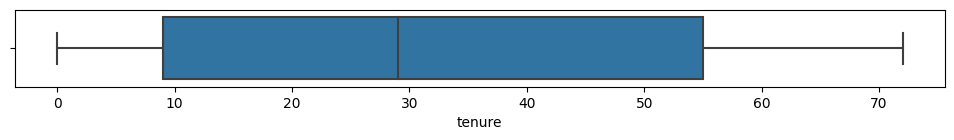

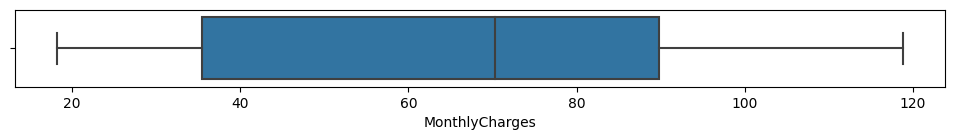

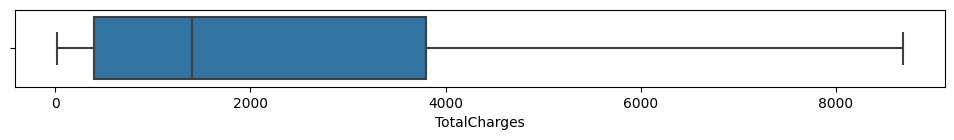

In [18]:
check_1=['tenure','MonthlyCharges','TotalCharges']
for i in check_1:
  plt.figure(figsize = (12,1))
  sns.boxplot(x=df1[i])

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Categorical_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in Categorical_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [20]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


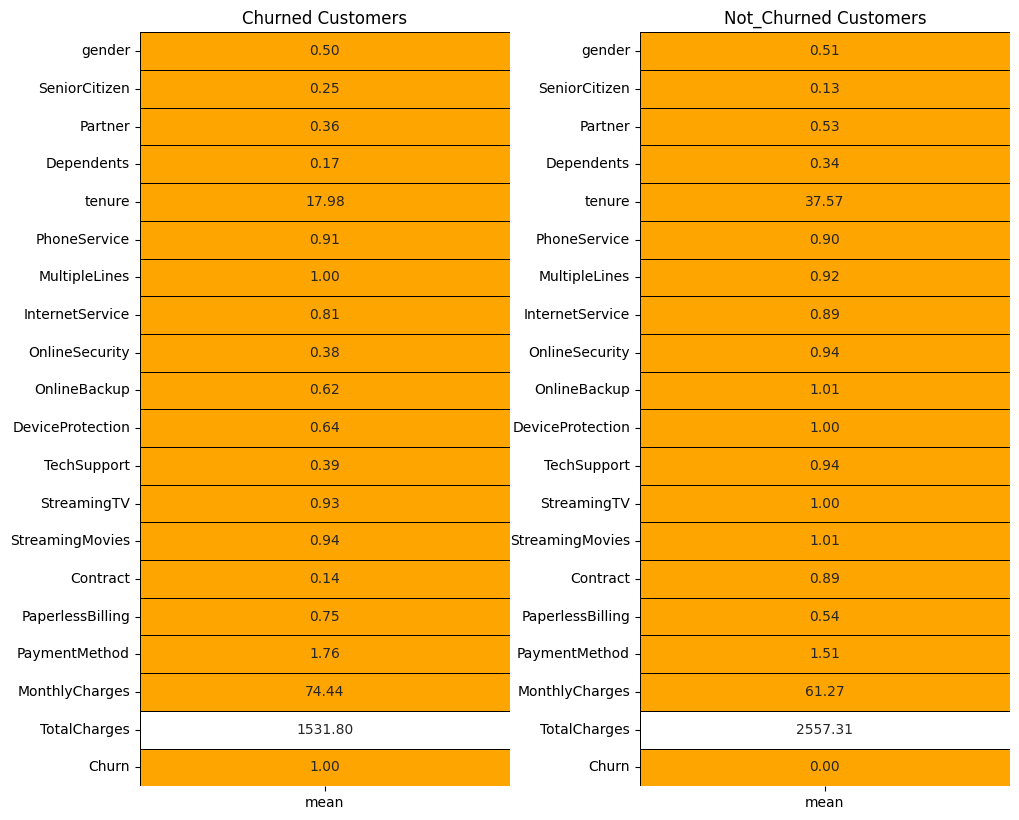

In [21]:
##Mean values of all the features for churned and not-churned customers.
colors = ['orange','white']

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,8))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

In [22]:
#In contrast to those who stayed, who had an average tenure of 37.57 months, the consumers who left had a low mean tenure of 17.98 months.
#The average values for DeviceProtection, OnlineSecurity, OnlineBackup, and TechSupport are greater for non-churning customers than for churning customers. This can be a helpful clue or area of emphasis.
#Contract values for Churned customers are significantly lower than those for #Non-Churned customers.
#The mean monthly charges of churning clients are higher at 74.44 than those of non-churning customers are at 61.27.
#Total Charges for #Not-Churned Customers are greater at 2557.31 than for Churn Customers are at 1531.80.
#From these and other values, we may infer that some features exhibit a distinct difference that may be used to attract more clients who might otherwise leave and ensure that they continue using the services.


In [23]:
#Dividing features into Numerical and Categorical :

In [24]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print(f"Categorical Features : {categorical_features}")
print(f"Numerical Features : {numerical_features}")

Categorical Features : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical Features : ['tenure', 'MonthlyCharges', 'TotalCharges']


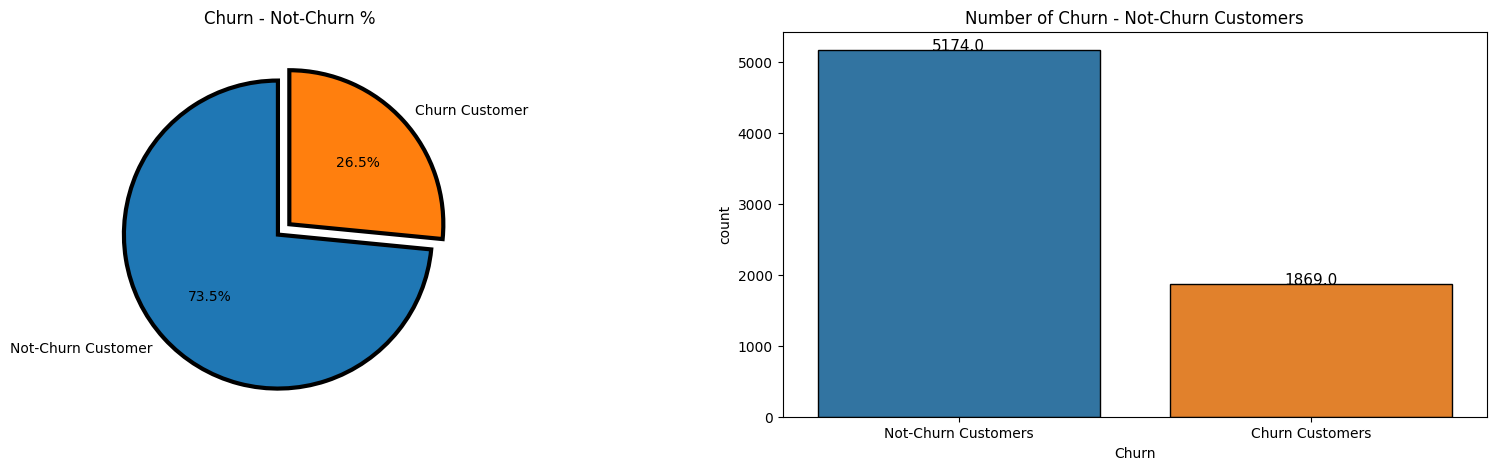

In [25]:
l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 3,'antialiased' : True})
plt.title('Churn - Not-Churn %');
plt.subplot(1,2,2)
ax = sns.countplot( data = df ,x = 'Churn' ,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Number of Churn - Not-Churn Customers');
plt.show()

In [26]:
#The dataset is unbalanced in a near about 3 : 1 ratio for Not-Churn : Churn customers

In [27]:
#Categorical Features vs Target Variable (Churn):

In [28]:
m1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
m2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for
m3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

In [29]:
#This dataset has an excessive number of category features!
#Depending on their values or the name of the column, we classify them into 3 groups.


In [30]:
#Group 1 : Customer Information :
#gender | SeniorCitizen | Partner | Dependents |

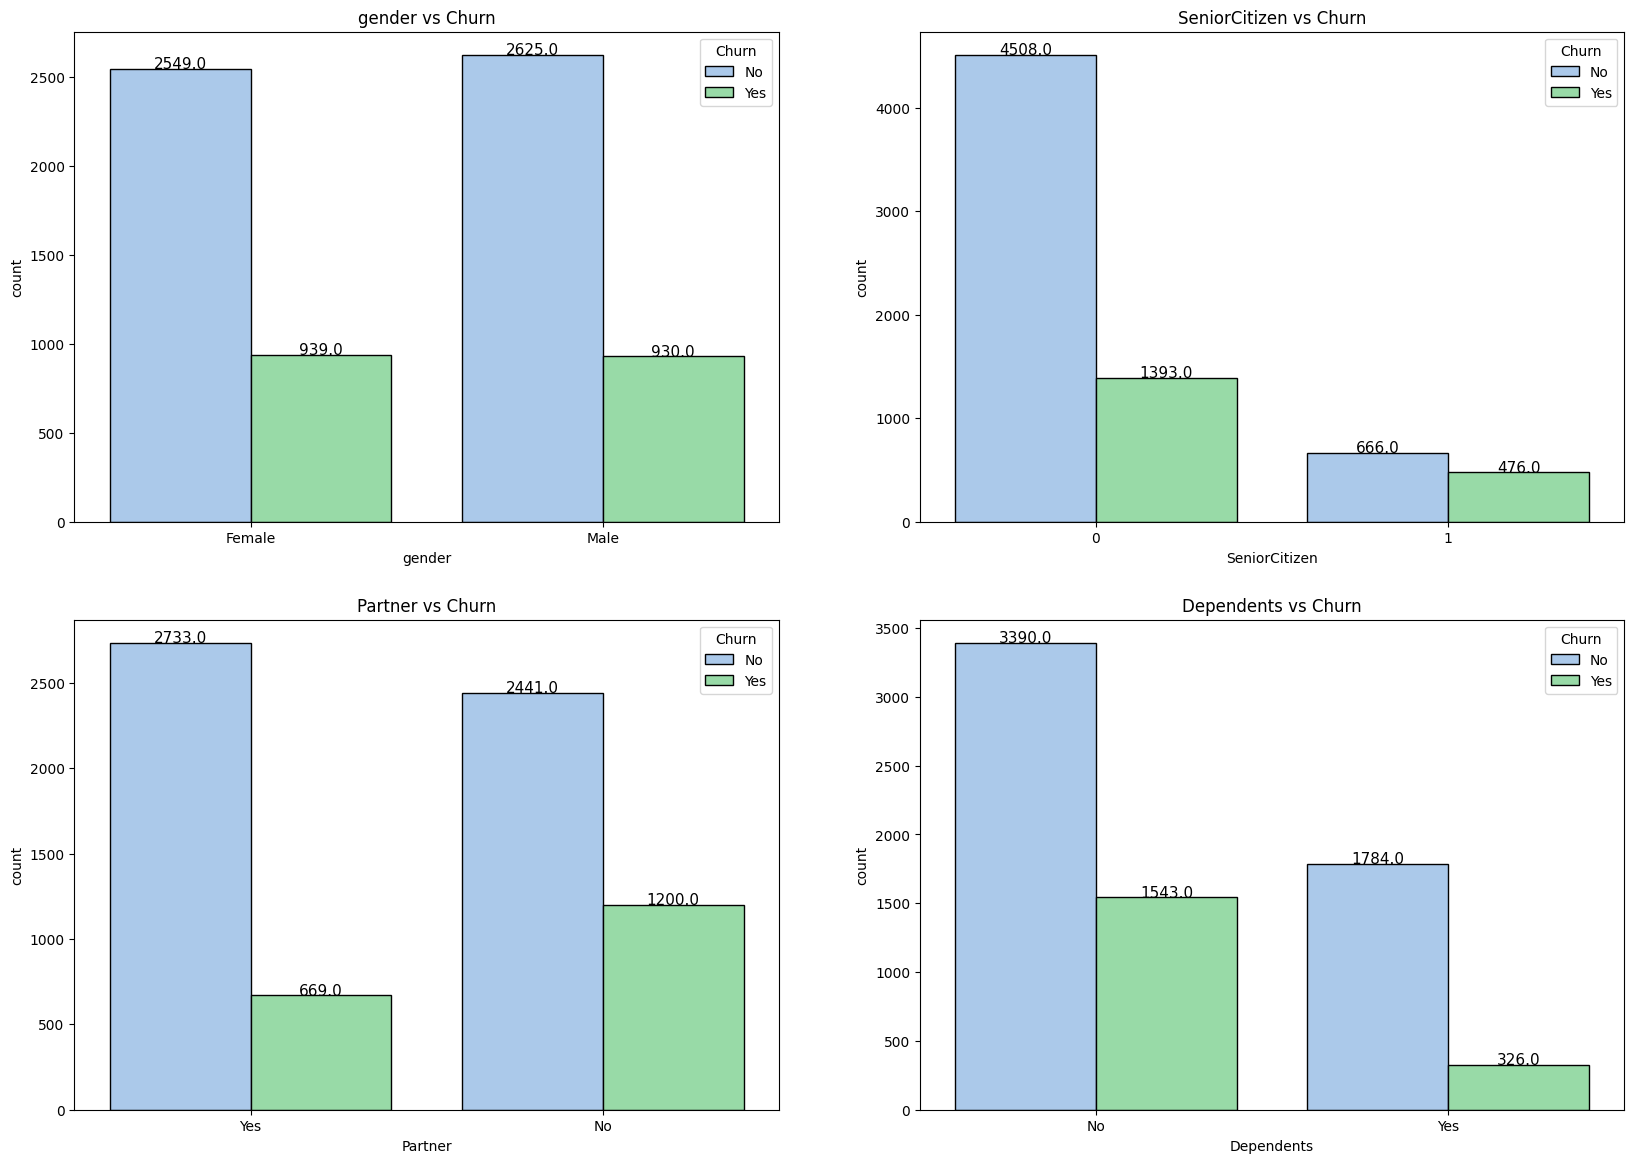

In [31]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(m1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(data = df, x = m1[i],hue = "Churn",palette = ['#a1c9f4', '#8de5a1'],edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
        title = m1[i] + ' vs Churn'
    plt.title(title);


In [32]:
#Both male and female customers experience high rates of client attrition.
#Similarly, there aren't many SeniorCitizen consumers.
#Out of 1142 Senior Citizen consumers, that represents a total of 476 customers.
#Similar to how high churning is for customers without dependents, clients who live with a partner see less customer turnover than those who do not.

In [33]:
#Group 2: Services Subscribed by the Customer :
#For visualization purposes, we will create 2 groups!
#PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

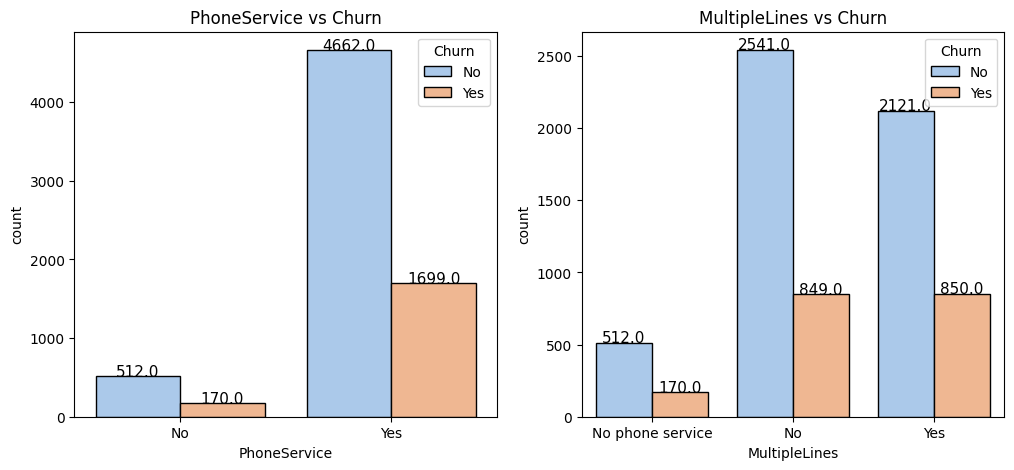

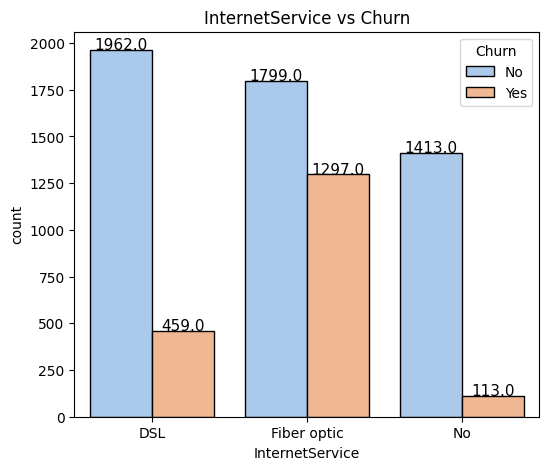

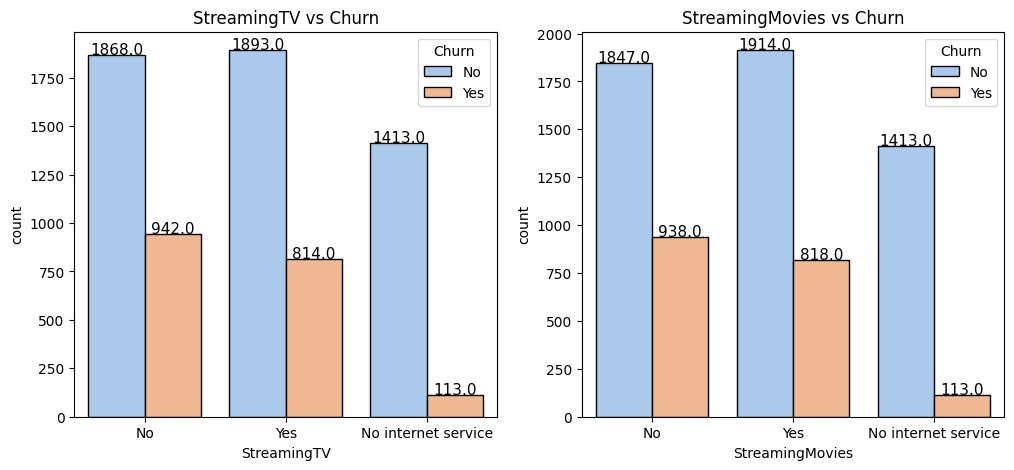

In [34]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(m2[0:2])):
    plt.subplot(1,2,i + 1)
    sns.set_palette("pastel")
    ax = sns.countplot(data = df,x = m2[i],hue = "Churn",edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = m2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
sns.set_palette("pastel")
ax = sns.countplot(data = df, x = m2[2],hue = "Churn",edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = m2[2] + ' vs Churn'
plt.title(title);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(m2[3:5])):
    plt.subplot(1,2,i + 1)
    sns.set_palette("pastel")
    ax = sns.countplot(data = df, x = m2[i + 3],hue = "Churn",edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = m2[i + 3] + ' vs Churn'
    plt.title(title);

In [35]:
#Despite having no phone service, more consumers for PhoneService remained as opposed to those who stopped using the services.
#When there are MultipleLines, the churn rate is the same whether there are multiple lines present or not.
#Contrary to what can be seen from the aforementioned graph, a significant portion of customers have expressed their opposition to employing fiber optic connections to deliver internet service.
#The graph shown by StreamingTV and StreamingMovies is the same. Regardless of having a subscription to streaming TV and movies, many customers have left. It appears that the streaming content was not solely to blame!

In [36]:
#Group 2: Services Subscribed by the Customer :
#OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

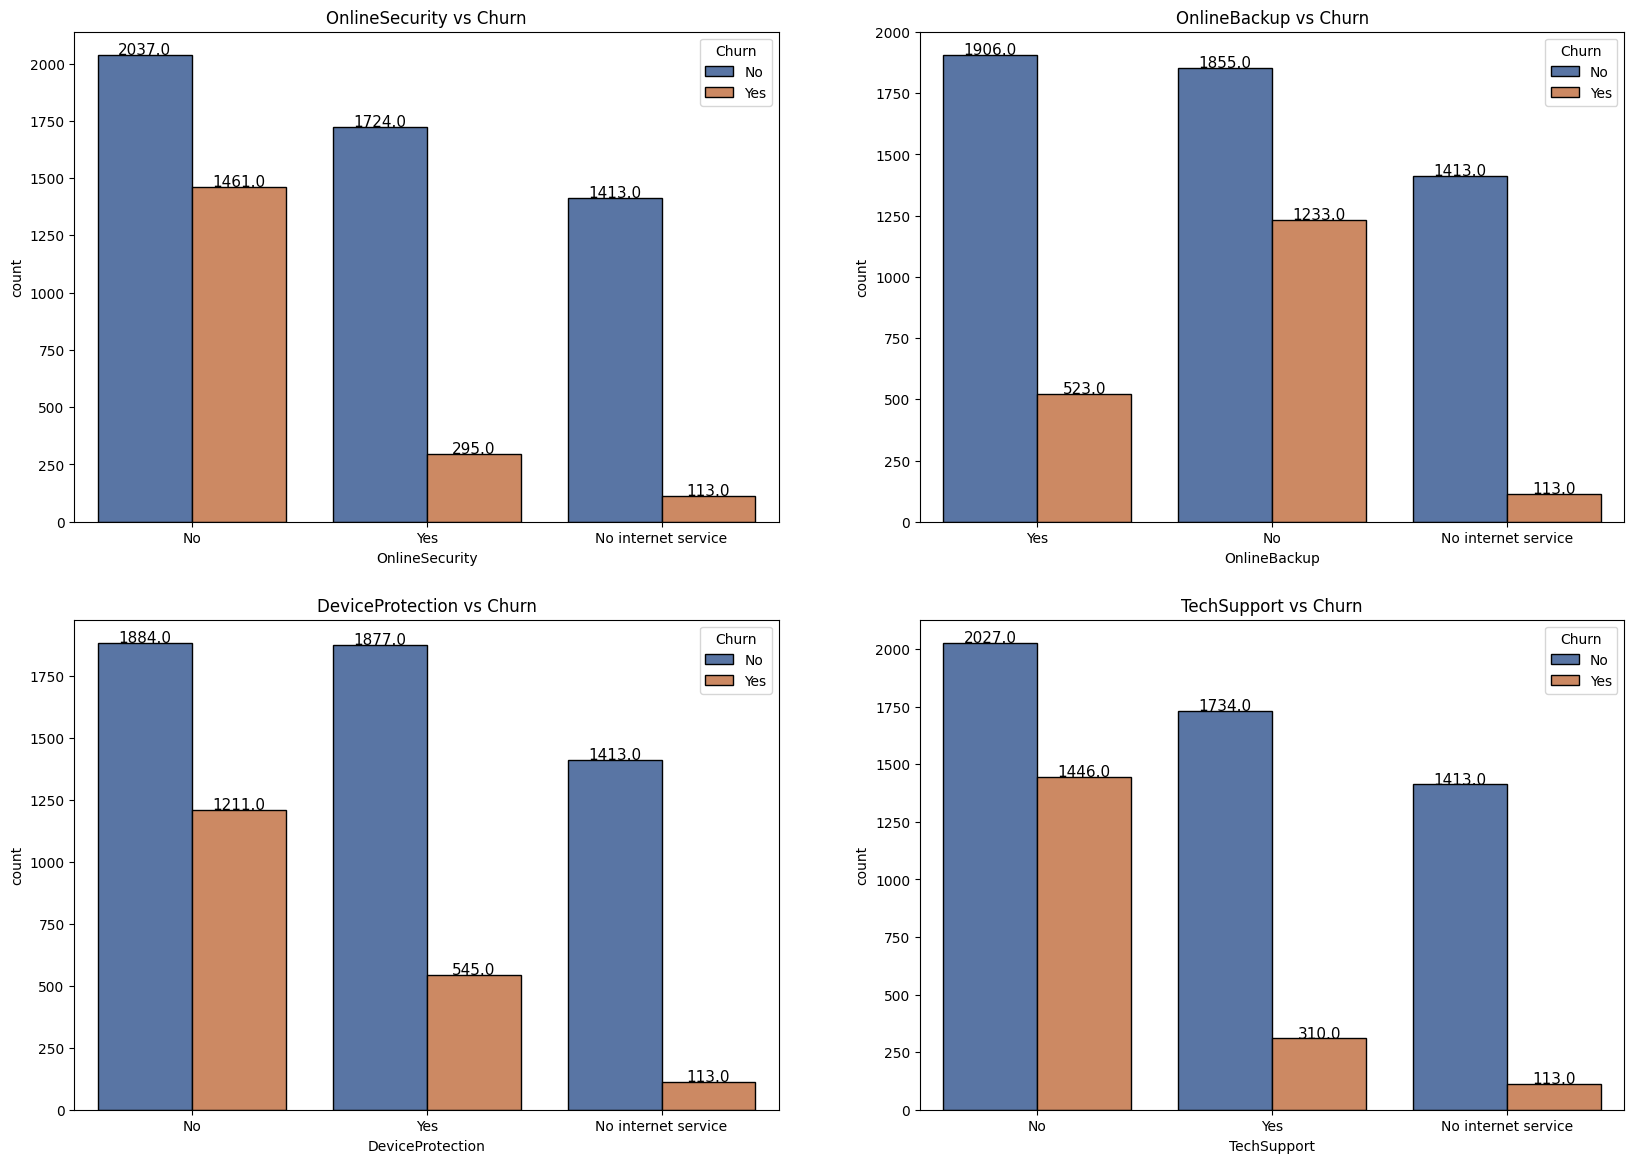

In [37]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(m2[-4:])):
    plt.subplot(2,2,i + 1)
    sns.set_palette("deep")
    ax = sns.countplot(x=m2[-4 + i],data = df,hue = "Churn",edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = m2[-4 + i] + ' vs Churn'
    plt.title(title);


In [38]:
#From the above visualizations, services related to online security, online backup, device protection, and tech support are essential when it comes to satisfying clients.
#When it comes to inadequate services with the aforementioned features, a large percentage of customers have moved their service provider.

In [39]:
#Group 3 : Contract | PaperlessBilling | PaymentMethod |

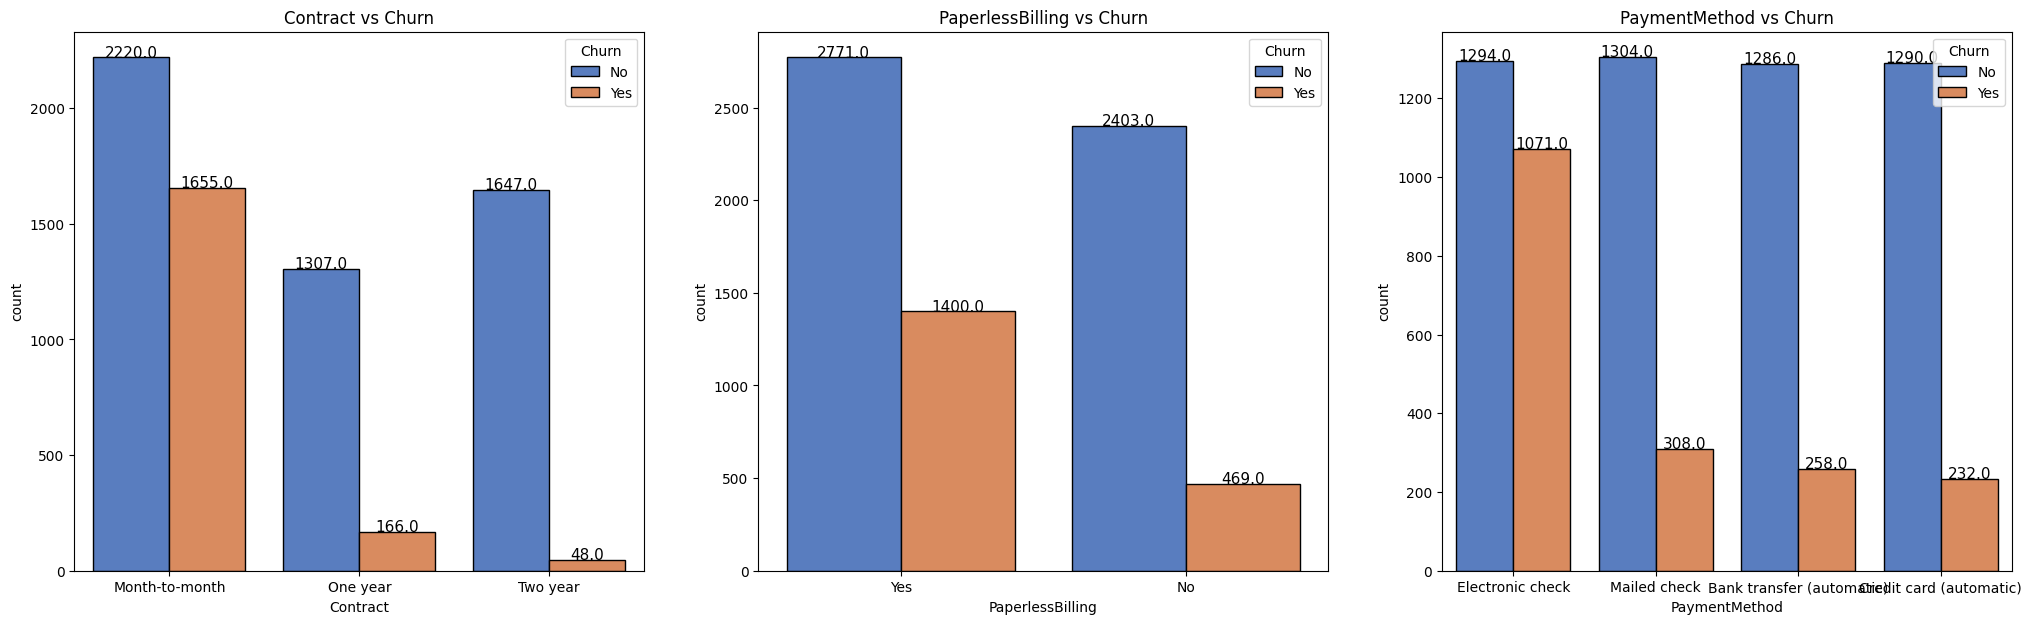

In [40]:
#colors = ['#D7CCC8','#89CFF0']
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
sns.set_palette("muted")
ax = sns.countplot(data = df,x = m3[0],hue = "Churn",edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = m3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
sns.set_palette("muted")
ax = sns.countplot(data = df,x = m3[1],hue = "Churn",edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = m3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
sns.set_palette("muted")
ax = sns.countplot(data = df,x = m3[2],hue = "Churn",edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = m3[2] + ' vs Churn'
plt.title(title);


In [41]:
#A Month-to-Month based Contract has a high rate of customer churn. This is likely a result of the clients testing out the various services that are offered to them; hence, in order to save money, a one-month service is tested out!
#Another factor might be that the general quality of the phone, streaming, and internet services varied.

#PaperlessBilling illustrates the high rate of client churn.

#This is most likely a result of a payment or receipt issue.

#It is obvious that customers disliked the electronic check payment method.

#Out of the 2365 invoices paid via electronic check, a startling 1071 clients dropped out of the service pool as a result.

#The company must either abandon the electronic check process or simplify and improve it.

In [42]:
#Numerical Features :
#Distribution of Numerical Features :

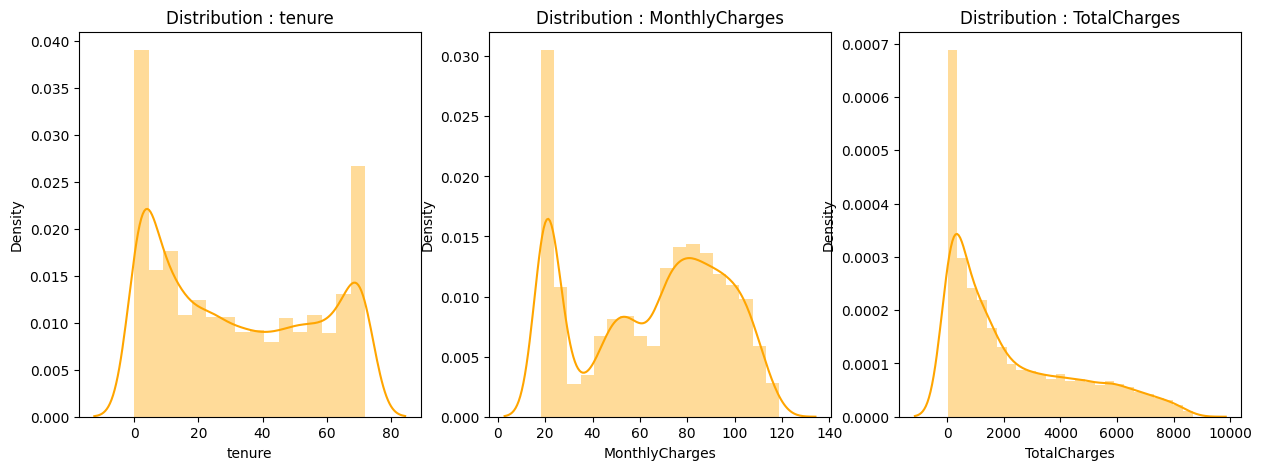

In [43]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_features[i]],color = 'orange')
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

In [44]:
#Numerical Features w.r.t Target Variable (Outcome) 

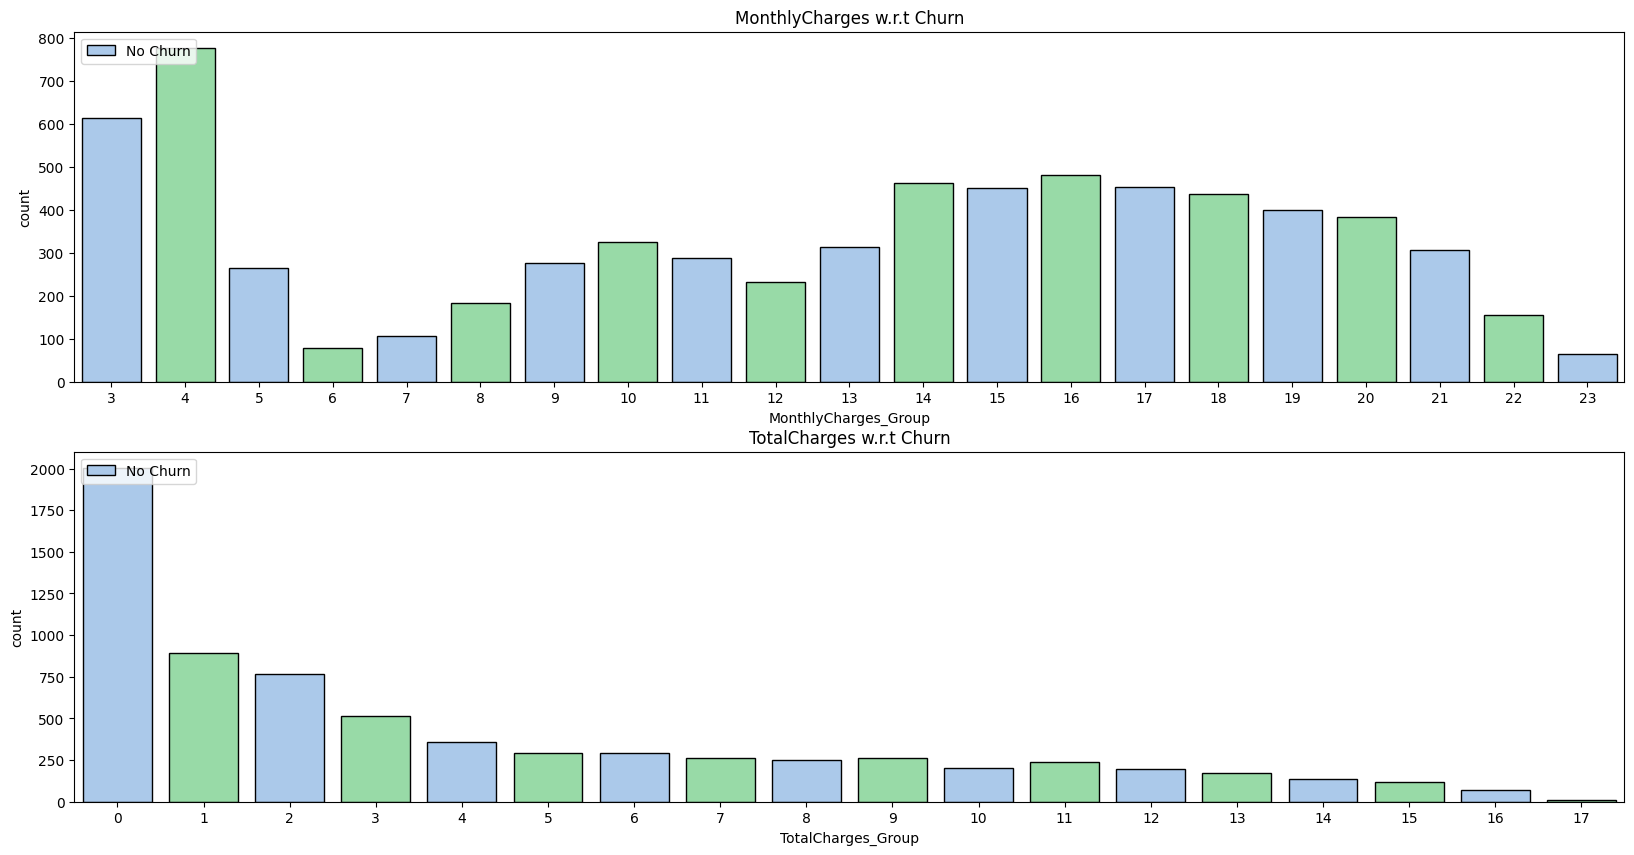

In [45]:
colors = ['#a1c9f4', '#8de5a1']
df1['MonthlyCharges_Group'] = [int(i / 5) for i in df1['MonthlyCharges']]
df1['TotalCharges_Group'] = [int(i / 500) for i in df1['TotalCharges']]

fig, ax = plt.subplots(nrows = 2,ncols = 1,figsize = (20,10))
for i in range(len(numerical_features[1:])):
    plt.subplot(2,1,i+1)
    
    sns.countplot(x = numerical_features[1 + i]+'_Group',data = df1,palette = colors,edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title = numerical_features[1 + i] + ' w.r.t Churn'
    plt.title(title);

In [46]:
#For MonthlyCharges group, churn rate is high for the values between 65 (13x5) - 105 (21x5). 
#This MonthlyCharges range of values caused the customers to switch.
#A very high number of customers opted out of the services for the TotalCharges below 500. 
#This customer churning continues for a TotalCharges range of values from 0 (0x500) - 1000 (2x500).

# Machine Learning Model Building

In [47]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Group,TotalCharges_Group
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,1,2,29.85,29.85,0,5,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,1,0,3,56.95,1889.50,0,11,3
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,1,3,53.85,108.15,1,10,0
3,1,0,0,0,45,0,1,0,2,0,...,0,0,1,0,0,42.30,1840.75,0,8,3
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,1,14,0


# Check Model Performance With Imbalance Data

In [51]:
!pip install --upgrade scikit-learn

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [50]:
X= df1.drop('Churn', axis = 'columns')
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MonthlyCharges_Group,TotalCharges_Group
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,5,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,11,3
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,10,0
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,8,3
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,2,2,1,1,3,84.80,1990.50,16,3
7039,0,0,1,1,72,1,2,1,0,2,...,0,2,2,1,1,1,103.20,7362.90,20,14
7040,0,0,1,1,11,0,1,0,2,0,...,0,0,0,0,1,2,29.60,346.45,5,0
7041,1,1,1,0,4,1,2,1,0,0,...,0,0,0,0,1,3,74.40,306.60,14,0


In [51]:
y = df1['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

### Split data into 80:20 Ratio

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

## Created definitions for Model training and model evaluation

In [53]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    #cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    #print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    #print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    #plot_roc_curve(classifier, x_test,y_test)
    #plt.title('ROC_AUC_Plot')
    #plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Greens',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

# Naive Bayes

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1061
           1       0.49      0.71      0.58       348

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.79      0.74      0.76      1409



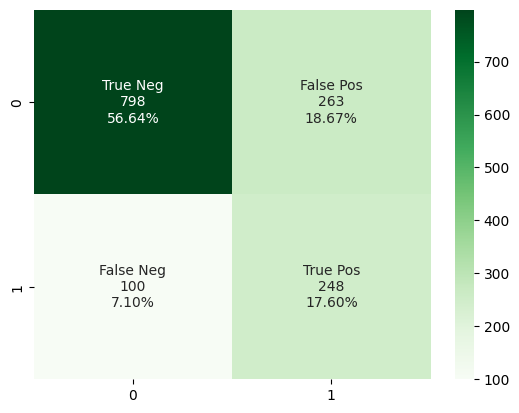

In [54]:
from sklearn.naive_bayes import GaussianNB
classifier_naive_bayes = GaussianNB()
model(classifier_naive_bayes,x_train,y_train,x_test,y_test)
model_evaluation(classifier_naive_bayes,x_test,y_test)


# Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1061
           1       0.62      0.52      0.57       348

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.80      0.80      0.80      1409



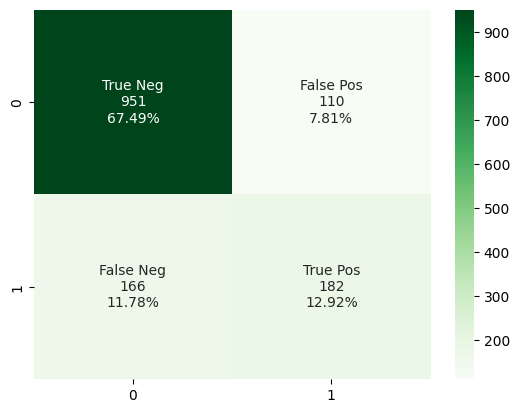

In [55]:
from sklearn.linear_model import LogisticRegression
classifier_LogisticRegression = LogisticRegression()

model(classifier_LogisticRegression,x_train,y_train,x_test,y_test)

model_evaluation(classifier_LogisticRegression,x_test,y_test)


# XG Boost

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1061
           1       0.61      0.52      0.56       348

    accuracy                           0.80      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



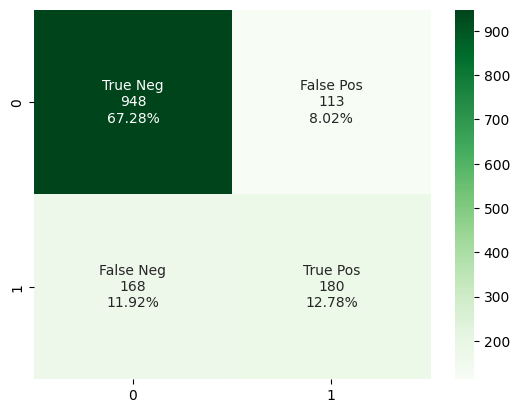

In [56]:
from xgboost import XGBClassifier

#classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
classifier_xgb = XGBClassifier()
model(classifier_xgb,x_train,y_train,x_test,y_test)
model_evaluation(classifier_xgb,x_test,y_test)

# Random Forest

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1061
           1       0.70      0.39      0.50       348

    accuracy                           0.81      1409
   macro avg       0.76      0.67      0.69      1409
weighted avg       0.79      0.81      0.79      1409



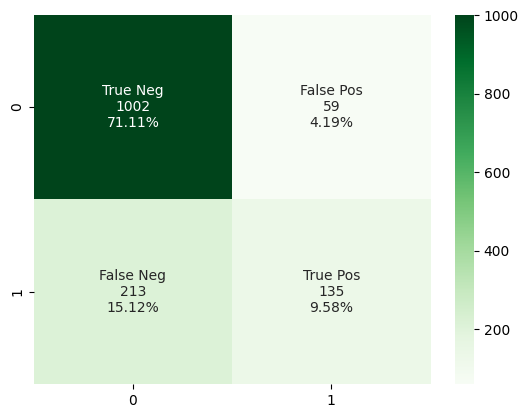

In [57]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
model(classifier_rf,x_train,y_train,x_test,y_test)
model_evaluation(classifier_rf,x_test,y_test)

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,precision_score,recall_score,auc,f1_score

In [59]:
MLA_dict = {'Naive Bayes':  GaussianNB(),
            'Logistic Regression': LogisticRegression(),
            'Random Forest' : RandomForestClassifier(),
            'XGBoost':XGBClassifier()
             }

In [60]:
def compare_models(MLA_dict,X_train,y_train):
    MLA_columns = []
    MLA_compare = pd.DataFrame(columns = MLA_columns)

    row_index = 0
    for algname, alg in MLA_dict.items():  
        predicted = alg.fit(X_train, y_train).predict(x_test)
        fp, tp, th = roc_curve(y_test, predicted)
        MLA_name = algname
        MLA_compare.loc[row_index,'MLA used'] = MLA_name
        MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
        MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
        MLA_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),4)
        MLA_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),4)
        MLA_compare.loc[row_index, 'F1-Score'] = round(f1_score(y_test, predicted),4)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

        row_index+=1

    return MLA_compare

In [61]:
MLA_compare = compare_models(MLA_dict=MLA_dict,X_train=x_train,y_train=y_train) 
MLA_compare = MLA_compare.sort_values(by = ['Recall'], ascending = False)
MLA_compare

,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,F1-Score,AUC
0,Naive Bayes,0.75,0.74,0.49,0.71,0.58,0.73
1,Logistic Regression,0.80,0.80,0.62,0.52,0.57,0.71
3,XGBoost,0.94,0.80,0.61,0.52,0.56,0.71
2,Random Forest,1.00,0.80,0.61,0.48,0.54,0.69


### The Naive Bayes model performed the best with a recall metric of 0.71. This could be because the probabilities for each attribute are calculated independently, which is why it’s called as “naive”. The Random Forest model did not perform as well because this model is created upon bias. The outcome is heavily influenced by majority vote, which in our data set is non-churn. The XGBoost also did not perform well because the 



### As we can see, the Machine Learning models did not performed well with imbalanced data. In order to increase the performance of each model, we need to perform Feature Engineering and balance the data using SMOTE.


# Feature Engineering

### Data Scaling

In [62]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Group,TotalCharges_Group
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,1,2,29.85,29.85,0,5,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,1,0,3,56.95,1889.50,0,11,3
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,1,3,53.85,108.15,1,10,0
3,1,0,0,0,45,0,1,0,2,0,...,0,0,1,0,0,42.30,1840.75,0,8,3
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,1,14,0


In [63]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
#ss = StandardScaler() # Standardization

df1.drop(columns = ['MonthlyCharges_Group','TotalCharges_Group'], inplace = True)

df1['tenure'] = mms.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.01,0,1,0,0,2,0,0,0,0,0,1,2,0.12,0.00,0
1,1,0,0,0,0.47,1,0,0,2,0,2,0,0,0,1,0,3,0.39,0.22,0
2,1,0,0,0,0.03,1,0,0,2,2,0,0,0,0,0,1,3,0.35,0.01,1
3,1,0,0,0,0.62,0,1,0,2,0,2,2,0,0,1,0,0,0.24,0.21,0
4,0,0,0,0,0.03,1,0,1,0,0,0,0,0,0,0,1,2,0.52,0.02,1


### We dropped 'MonthlyCharges_Group','TotalCharges_Group' columns and also performed normalization on tenure, MonthlyCharges and TotalCharges columns

## Correlation Matrix with respect to target column churn  :

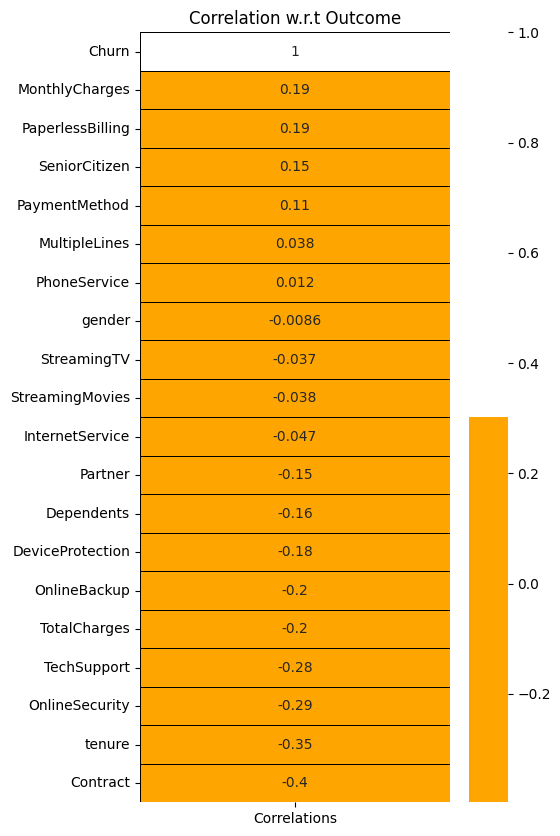

In [64]:
colors = ['orange','white']
corr = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,10))

sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');


MulipleLines, PhoneService, gender, StreamingTV, StreamingMovies and InternetService does not display any kind of correlation.
We are going to drop these columns.

## Feature Selection for Categorical Features :

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

## Chi-Squared Test

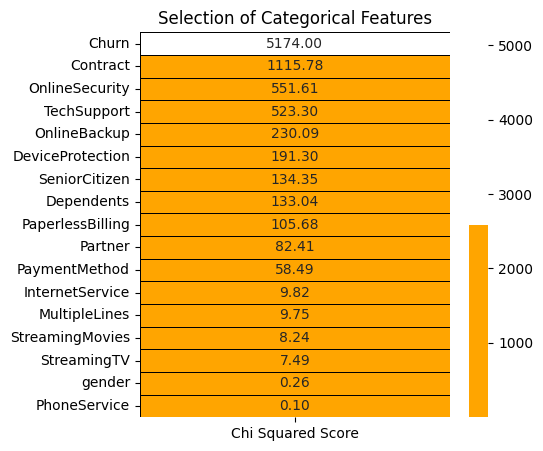

In [66]:
features = df1.loc[:,categorical_features]
target = df1.loc[:,'Churn']
#features with highest chi-squared statistics are selected
best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

PhoneService, gender, StreamingTV, StreamingMovies, MultipleLines and InternetService depicts a very low relation with Churn.



## Feature Selection for Numerical Features 

In [67]:
from sklearn.feature_selection import f_classif

## ANOVA Test

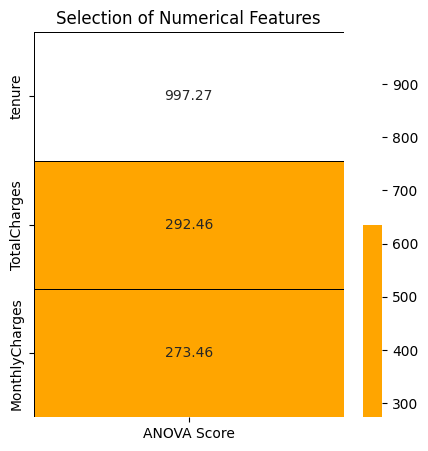

In [68]:
features = df1.loc[:,numerical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

According to the ANOVA test, higher the value of the ANOVA score, higher the importance of the feature.
From the above results, we need to include all the numerical features for modeling.

In [69]:
df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.01,0,2,0,0,0,1,2,0.12,0.00,0
1,0,0,0,0.47,2,0,2,0,1,0,3,0.39,0.22,0
2,0,0,0,0.03,2,2,0,0,0,1,3,0.35,0.01,1
3,0,0,0,0.62,2,0,2,2,1,0,0,0.24,0.21,0
4,0,0,0,0.03,0,0,0,0,0,1,2,0.52,0.02,1


We dropped the categorical columns those are not make any correlation with target column

## Check Model Performance using Balanced Data(SMOTE)

 We used sklearn imblearn to do oversampling

In [70]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [71]:
over = SMOTE(sampling_strategy = 1)

f1 = df1.iloc[:,:13].values
t1 = df1.iloc[:,13].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({0: 5174, 1: 5174})

##### We oversampled the minority samples of the target variable(churn) to the majority samples

Split Balanced data into 80:20 ratio 

In [72]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

## Naive Bayes

              precision    recall  f1-score   support

           0       0.80      0.68      0.73      1040
           1       0.72      0.83      0.77      1030

    accuracy                           0.75      2070
   macro avg       0.76      0.75      0.75      2070
weighted avg       0.76      0.75      0.75      2070



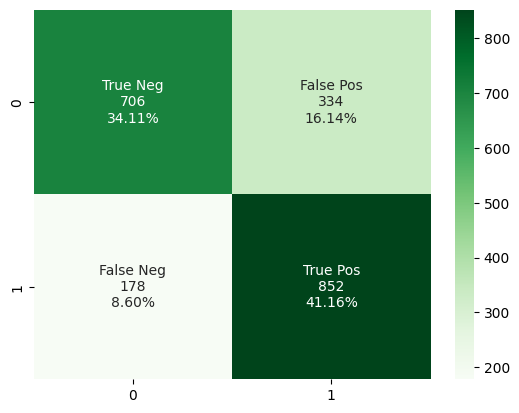

In [73]:
classifier_naive_bayes = GaussianNB()
model(classifier_naive_bayes,x_train,y_train,x_test,y_test)
model_evaluation(classifier_naive_bayes,x_test,y_test)

## Logistic Regression

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1040
           1       0.75      0.82      0.78      1030

    accuracy                           0.77      2070
   macro avg       0.78      0.77      0.77      2070
weighted avg       0.78      0.77      0.77      2070



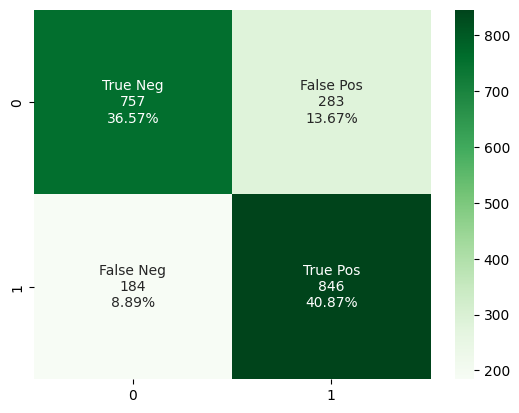

In [74]:
from sklearn.linear_model import LogisticRegression
classifier_LogisticRegression = LogisticRegression()

model(classifier_LogisticRegression,x_train,y_train,x_test,y_test)

model_evaluation(classifier_LogisticRegression,x_test,y_test)


## XG Boost

In [75]:
from xgboost import XGBClassifier

#classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
classifier_xgb = XGBClassifier()

In [76]:
model(classifier_xgb,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1040
           1       0.84      0.85      0.84      1030

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



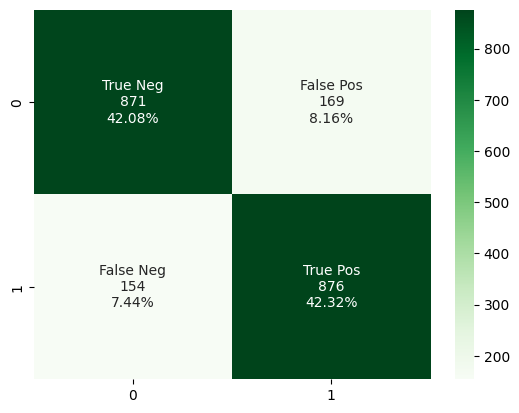

In [77]:
model_evaluation(classifier_xgb,x_test,y_test)

## Random Forest

In [78]:
#classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
classifier_rf = RandomForestClassifier()

In [79]:
model(classifier_rf,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1040
           1       0.83      0.85      0.84      1030

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



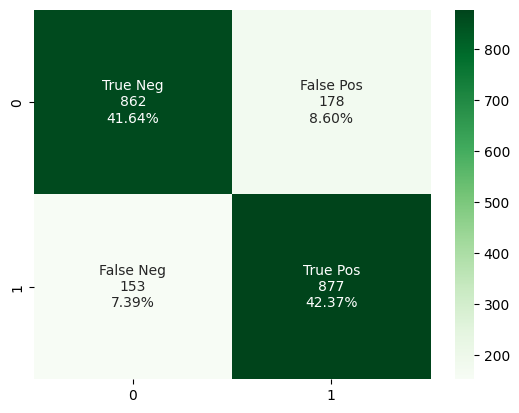

In [80]:
model_evaluation(classifier_rf,x_test,y_test)

## Hyperparameter Tunning Using GridSearchCV

In [81]:
f1

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 1.15422886e-01, 1.27509808e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.00000000e+00, 3.85074627e-01, 2.15866605e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.00000000e+00, 3.54228856e-01, 1.03104085e-02],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.77911569e+00, 8.26905641e-01, 1.67691060e-01],
       [8.94269281e-01, 1.00000000e+00, 8.94269281e-01, ...,
        2.00000000e+00, 8.18872542e-01, 4.93125468e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 7.52999438e-01, 8.66910265e-03]])

In [82]:
t1

array([0, 0, 1, ..., 1, 1, 1])

In [83]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [84]:
estimator = XGBClassifier(objective="binary:logistic")

In [85]:
xgboost_params = [{'n_estimators':[75,1000,125,145],
                   'learning_rate' : [0.09, 0.1, 0.2],  
                    'gamma': [0, 0.25, 1]}]

In [88]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=xgboost_params
)

In [89]:
grid_search.fit(f1, t1)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_c

In [90]:
df2 = pd.DataFrame(grid_search.cv_results_)
df2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.52,0.09,0.00,0.00,0,0.09,75,"{'gamma': 0, 'learning_rate': 0.09, 'n_estimat...",0.77,0.78,0.85,0.87,0.87,0.83,0.05,34
1,5.76,0.46,0.02,0.00,0,0.09,1000,"{'gamma': 0, 'learning_rate': 0.09, 'n_estimat...",0.72,0.76,0.88,0.89,0.90,0.83,0.08,23
2,0.79,0.07,0.01,0.00,0,0.09,125,"{'gamma': 0, 'learning_rate': 0.09, 'n_estimat...",0.75,0.77,0.86,0.88,0.88,0.83,0.06,26
3,0.93,0.10,0.01,0.00,0,0.09,145,"{'gamma': 0, 'learning_rate': 0.09, 'n_estimat...",0.75,0.77,0.86,0.88,0.88,0.83,0.06,24
4,0.48,0.03,0.00,0.00,0,0.10,75,"{'gamma': 0, 'learning_rate': 0.1, 'n_estimato...",0.76,0.78,0.86,0.87,0.88,0.83,0.05,28
5,5.89,0.44,0.02,0.00,0,0.10,1000,"{'gamma': 0, 'learning_rate': 0.1, 'n_estimato...",0.71,0.76,0.88,0.89,0.90,0.83,0.08,35
6,0.73,0.01,0.00,0.00,0,0.10,125,"{'gamma': 0, 'learning_rate': 0.1, 'n_estimato...",0.75,0.78,0.87,0.88,0.88,0.83,0.06,3
7,1.07,0.18,0.01,0.00,0,0.10,145,"{'gamma': 0, 'learning_rate': 0.1, 'n_estimato...",0.75,0.77,0.87,0.88,0.88,0.83,0.06,9
8,0.52,0.03,0.01,0.00,0,0.20,75,"{'gamma': 0, 'learning_rate': 0.2, 'n_estimato...",0.75,0.77,0.87,0.88,0.88,0.83,0.06,5
9,8.46,2.30,0.03,0.01,0,0.20,1000,"{'gamma': 0, 'learning_rate': 0.2, 'n_estimato...",0.70,0.75,0.88,0.88,0.89,0.82,0.08,36


In [91]:
df2[['param_learning_rate','param_gamma','param_n_estimators','mean_test_score']]

,param_learning_rate,param_gamma,param_n_estimators,mean_test_score
0,0.09,0,75,0.83
1,0.09,0,1000,0.83
2,0.09,0,125,0.83
3,0.09,0,145,0.83
4,0.10,0,75,0.83
5,0.10,0,1000,0.83
6,0.10,0,125,0.83
7,0.10,0,145,0.83
8,0.20,0,75,0.83
9,0.20,0,1000,0.82


### Best Parameter

In [92]:
grid_search.best_params_

{'gamma': 1, 'learning_rate': 0.1, 'n_estimators': 125}

### Hyperparameter Tunning for Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier()

In [94]:
param_grid = [{'n_estimators':[150,180,200,250], 'max_features': [10,12,14], 'criterion':['gini','entropy']}]

In [95]:
#rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rf_estimator, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [96]:
g_search.fit(f1, t1)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': [10, 12, 14],
                          'n_estimators': [150, 180, 200, 250]}],
             return_train_score=True)

In [97]:
df3 = pd.DataFrame(g_search.cv_results_)
df3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.81,0.12,0.09,0.00,gini,10,150,"{'criterion': 'gini', 'max_features': 10, 'n_e...",0.77,0.84,0.86,0.82,0.04,-2147483648,1.00,1.00,1.00,1.00,0.00
1,3.25,0.04,0.11,0.00,gini,10,180,"{'criterion': 'gini', 'max_features': 10, 'n_e...",0.76,0.84,0.86,0.82,0.04,-2147483648,1.00,1.00,1.00,1.00,0.00
2,3.58,0.11,0.12,0.00,gini,10,200,"{'criterion': 'gini', 'max_features': 10, 'n_e...",0.76,0.84,0.86,0.82,0.04,-2147483648,1.00,1.00,1.00,1.00,0.00
3,4.49,0.14,0.16,0.01,gini,10,250,"{'criterion': 'gini', 'max_features': 10, 'n_e...",0.77,0.83,0.86,0.82,0.04,-2147483648,1.00,1.00,1.00,1.00,0.00
4,3.13,0.06,0.09,0.00,gini,12,150,"{'criterion': 'gini', 'max_features': 12, 'n_e...",0.76,0.84,0.85,0.82,0.04,-2147483648,1.00,1.00,1.00,1.00,0.00
5,4.22,0.30,0.12,0.00,gini,12,180,"{'criterion': 'gini', 'max_features': 12, 'n_e...",0.76,0.84,0.85,0.82,0.04,-2147483648,1.00,1.00,1.00,1.00,0.00
6,4.28,0.19,0.13,0.01,gini,12,200,"{'criterion': 'gini', 'max_features': 12, 'n_e...",0.76,0.83,0.86,0.82,0.04,-2147483648,1.00,1.00,1.00,1.00,0.00
7,5.63,0.56,0.17,0.03,gini,12,250,"{'criterion': 'gini', 'max_features': 12, 'n_e...",0.76,0.84,0.86,0.82,0.04,-2147483648,1.00,1.00,1.00,1.00,0.00
8,0.05,0.01,0.00,0.00,gini,14,150,"{'criterion': 'gini', 'max_features': 14, 'n_e...",NaN,NaN,NaN,NaN,NaN,-2147483648,NaN,NaN,NaN,NaN,NaN
9,0.05,0.00,0.00,0.00,gini,14,180,"{'criterion': 'gini', 'max_features': 14, 'n_e...",NaN,NaN,NaN,NaN,NaN,-2147483648,NaN,NaN,NaN,NaN,NaN


In [98]:
df3[['param_n_estimators','param_max_features','param_criterion','mean_test_score']]

,param_n_estimators,param_max_features,param_criterion,mean_test_score
0,150,10,gini,0.82
1,180,10,gini,0.82
2,200,10,gini,0.82
3,250,10,gini,0.82
4,150,12,gini,0.82
5,180,12,gini,0.82
6,200,12,gini,0.82
7,250,12,gini,0.82
8,150,14,gini,NaN
9,180,14,gini,NaN


In [99]:
g_search.best_params_

{'criterion': 'gini', 'max_features': 10, 'n_estimators': 150}

### XGboost with Best Parameter

In [100]:

from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.2,gamma = 1,n_estimators = 1000)


In [101]:
model(classifier_xgb,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1040
           1       0.84      0.86      0.85      1030

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



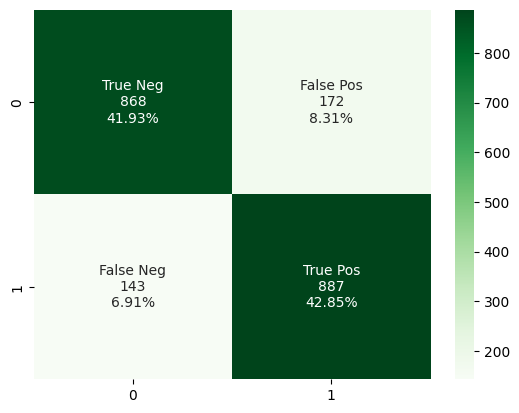

In [102]:
model_evaluation(classifier_xgb,x_test,y_test)

### Random Forest with Best Parameter

In [103]:
#'criterion': 'entropy', 'max_features': 10, 'n_estimators': 200
#criterion': 'gini', 'max_features': 10, 'n_estimators': 250
classifier_rf = RandomForestClassifier( criterion = 'gini', max_features = 10, n_estimators = 200)

In [104]:
classifier_rf = RandomForestClassifier( max_depth = None, random_state = 2 )

In [105]:
model(classifier_rf,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1040
           1       0.84      0.86      0.85      1030

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



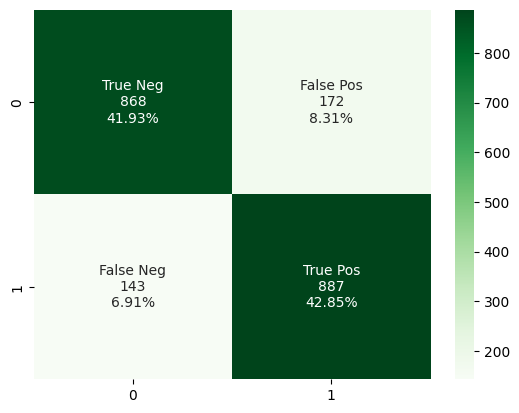

In [106]:
model_evaluation(classifier_xgb,x_test,y_test)

Model Evalution with SMOTE

In [107]:
# Application of all Machine Learning methods

MLA_sm_dict = {'Naive Bayes with SMOTE':  GaussianNB(),
            'Logistic Regression with SMOTE ': LogisticRegression(),
            'Random Forest with SMOTE' : RandomForestClassifier(),
            'Random Forest with SMOTE AND Best param': RandomForestClassifier(criterion = 'gini', max_features = 10, n_estimators = 200),
            'XGBoost with SMOTE':XGBClassifier(),
            'XGBoost with SMOTE AND Best param':XGBClassifier(objective="binary:logistic",learning_rate= 0.2,gamma = 1,n_estimators = 1000)

             }

In [108]:
def compare_models(MLA_dict,X_train,y_train):
    MLA_columns = []
    MLA_compare = pd.DataFrame(columns = MLA_columns)

    row_index = 0
    for algname, alg in MLA_dict.items():  
        predicted = alg.fit(X_train, y_train).predict(x_test)
        fp, tp, th = roc_curve(y_test, predicted)
        MLA_name = algname
        MLA_compare.loc[row_index,'MLA used'] = MLA_name
        MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
        MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
        MLA_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),4)
        MLA_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),4)
        MLA_compare.loc[row_index, 'F1-Score'] = round(f1_score(y_test, predicted),4)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

        row_index+=1

    return MLA_compare

In [109]:
MLA_compare_smote = compare_models(MLA_dict=MLA_sm_dict,X_train=x_train,y_train=y_train)
MLA_compare_smote

,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,F1-Score,AUC
0,Naive Bayes with SMOTE,0.75,0.75,0.72,0.83,0.77,0.75
1,Logistic Regression with SMOTE,0.77,0.77,0.75,0.82,0.78,0.77
2,Random Forest with SMOTE,1.00,0.84,0.83,0.85,0.84,0.84
3,Random Forest with SMOTE AND Best param,1.00,0.83,0.83,0.84,0.83,0.83
4,XGBoost with SMOTE,0.94,0.84,0.84,0.85,0.84,0.84
5,XGBoost with SMOTE AND Best param,0.91,0.85,0.84,0.86,0.85,0.85


Camparing model evalution original dataset VS model SMOTE technique

In [110]:
MLA_final_compare = pd.concat([MLA_compare,MLA_compare_smote],axis=0)
MLA_final_compare.sort_values(by = ['Recall'], ascending = False,inplace=True)
MLA_final_compare

,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,F1-Score,AUC
5,XGBoost with SMOTE AND Best param,0.91,0.85,0.84,0.86,0.85,0.85
4,XGBoost with SMOTE,0.94,0.84,0.84,0.85,0.84,0.84
2,Random Forest with SMOTE,1.00,0.84,0.83,0.85,0.84,0.84
3,Random Forest with SMOTE AND Best param,1.00,0.83,0.83,0.84,0.83,0.83
0,Naive Bayes with SMOTE,0.75,0.75,0.72,0.83,0.77,0.75
1,Logistic Regression with SMOTE,0.77,0.77,0.75,0.82,0.78,0.77
0,Naive Bayes,0.75,0.74,0.49,0.71,0.58,0.73
1,Logistic Regression,0.80,0.80,0.62,0.52,0.57,0.71
3,XGBoost,0.94,0.80,0.61,0.52,0.56,0.71
2,Random Forest,1.00,0.80,0.61,0.48,0.54,0.69


# Conclusion

When comparing the machine learning models with the original data, the recall metric for the Naive Bayes, Logistic Regression, XGBoost, and Random Forest models is 0.71, 0.52, 0.52, and 0.48 respectively. 

The Naive Bayes model performed the best with a recall metric of 0.71. Because the probabilities for each attribute are calculated independently and may be thats why it’s called as “naive”


When comparing the recall metric with the modified dataset and with the SMOTE technique, the recall metric for all four models significantly increased. The recall metric for the Naive Bayes Logistic Regression, XGBoost, and Random Forest models is 0.81, 0.83, 0.85, and 0.87 respectively. The Random Forest with SMOTE model performed the best with a recall metric of 0.87

After hyperparameter tuning, we noticed minor changes in Recall Values of the XGBoost and Random Forest classifier compared to the XGBoost with SMOTE and Random Forest with SMOTE.

Overall, the models performed better after modifying the data set by using Feature Selection and Scaling and applying the SMOTE technique.


In [115]:
classifier_xgb = XGBClassifier(learning_rate= 0.2,gamma = 1,n_estimators = 1000)


In [116]:
import pickle

# Save the model as a pickle file
with open('XGBClassifier_final.pkl', 'wb') as file:
    pickle.dump(classifier_xgb, file)